# THE BIG ANALYSIS

In this project I will make a market basket analysis along with a forecast to predict the sales of next year and produce some insight to help guide the sales and marketing team.
<br>
<br>
the questions I will solve are:<br>
* Q: What was the best Year for sales? How much was earned that Year?<br>
* Q: What was the best month for sales? How much was earned that month?<br>
* Q: What City had the highest number of sales?<br>
* Q: What time should we display adverstisement to maximize likelihood of customer's buying product?<br>
* Q: What product sold the most? Why do you think it sold the most?<br>

I will analyse the month of January and I'll explain it step by step,the rest of month I'll apply a function to automatize the process without explaining each month, but the same rules that we will see in January could apply in the rest of the months.

In [4]:
# LETS START IMPORTING THE LIBRARIES
import pandas as pd
from datetime import datetime

In [5]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
january=pd.read_csv('archive/Sales_January_2019.csv')

In [6]:
# THIS IS HOW THE DATAFRAME LOOKS LIKE BEFORE
january.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [7]:
# THE FUNCTION THAT WE WILL USE TO CLEAN ALL DATAFRAMES.
def clean(dataframe):
    dataframe.dropna(how='all',inplace=True)
    dataframe.drop(dataframe[dataframe['Order ID']=='Order ID'].index,inplace=True)
    dataframe['Order Date']=pd.to_datetime(dataframe['Order Date'],format='%m/%d/%y %H:%M')
    dataframe['Price Each']=[float(x) for x in dataframe['Price Each']]
    dataframe['Quantity Ordered']=[int(x) for x in dataframe['Quantity Ordered']]
    dataframe['Sales']=dataframe['Quantity Ordered']*dataframe['Price Each']
    dataframe['Purchase Address']=[x.split(',')[1].strip() for x in dataframe['Purchase Address']]
    return dataframe

In [8]:
clean(january)
january
# THE DATAFRAME AFTER 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,Boston,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,Portland,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,San Francisco,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,Los Angeles,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,Austin,11.99
...,...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,2019-01-26 19:09:00,Dallas,109.99
9719,150498,27in FHD Monitor,1,149.99,2019-01-10 22:58:00,San Francisco,149.99
9720,150499,ThinkPad Laptop,1,999.99,2019-01-21 14:31:00,Portland,999.99
9721,150500,AAA Batteries (4-pack),2,2.99,2019-01-15 14:21:00,Los Angeles,5.98


The analysis of January start here, all this steps could be applied to the other months.
## January

<br>
Sales for january

In [9]:
sales_month=[]
x=january['Sales'].sum()
sales_month.append(round(x,2))
print(f'The total sales for January is {round(x,2)} £')

The total sales for January is 1815335.12 £


<br><br>
Total sales for January per city

In [10]:
january.groupby('Purchase Address')['Sales'].sum()  # sales for city

Purchase Address
Atlanta          149163.38
Austin            87587.08
Boston           199776.55
Dallas           143465.50
Los Angeles      287613.86
New York City    259250.67
Portland         114832.57
San Francisco    433103.45
Seattle          140542.06
Name: Sales, dtype: float64

<br><br>
Count of order made by city could be usefull when preparing the budget for logistic and delivery.

In [11]:
january['Purchase Address'].value_counts() # count of orders by city

San Francisco    2354
Los Angeles      1529
New York City    1303
Boston           1048
Atlanta           786
Dallas            785
Seattle           726
Portland          623
Austin            527
Name: Purchase Address, dtype: int64

<br><br>
Now let's see the sales of each item per city, this could bring some insight like knowing which item we should focus on to sell or which one we should discard if any or simply help marketing target those items with lower sells, the posibilities are enormous.

In [12]:
pd.set_option("display.max_rows", 200, "display.max_columns", 200)
january.groupby(['Purchase Address','Product'])[['Sales']].sum() # sales per city and item 


Sales
Purchase Address Product                             
Atlanta          20in Monitor                 1649.85
                 27in 4K Gaming Monitor       7409.81
                 27in FHD Monitor             4649.69
                 34in Ultrawide Monitor       8359.78
                 AA Batteries (4-pack)         399.36
                 AAA Batteries (4-pack)        391.69
                 Apple Airpods Headphones    10350.00
                 Bose SoundSport Headphones   6199.38
                 Flatscreen TV                6600.00
                 Google Phone                14400.00
                 LG Dryer                     3000.00
                 LG Washing Machine           1200.00
                 Lightning Charging Cable     1659.45
                 Macbook Pro Laptop          25500.00
                 ThinkPad Laptop             27999.72
                 USB-C Charging Cable         1075.50
                 Vareebadd Phone              2800.00
                 Wired Headphones             1019.15
                 iPhone                      24500.00
Austin           20in Monitor                 1209.89
                 27in 4K Gaming Monitor       5069.87
                 27in FHD Monitor             3749.75
                 34in Ultrawide Monitor       4939.87
                 AA Batteries (4-pack)         280.32
                 AAA Batteries (4-pack)        257.14
                 Apple Airpods Headphones     6750.00
                 Bose SoundSport Headphones   3999.60
                 Flatscreen TV                3900.00
                 Google Phone                10800.00
                 LG Dryer                     1800.00
                 LG Washing Machine            600.00
                 Lightning Charging Cable      867.10
                 Macbook Pro Laptop          20400.00
                 ThinkPad Laptop              6999.93
                 USB-C Charging Cable          896.25
                 Vareebadd Phone              2400.00
                 Wired Headphones              767.36
                 iPhone                      11900.00
Boston           20in Monitor                 2309.79
                 27in 4K Gaming Monitor      11309.71
                 27in FHD Monitor             6299.58
                 34in Ultrawide Monitor      12159.68
                 AA Batteries (4-pack)         599.04
                 AAA Batteries (4-pack)        508.30
                 Apple Airpods Headphones    13350.00
                 Bose SoundSport Headphones   9099.09
                 Flatscreen TV                9000.00
                 Google Phone                19800.00
                 LG Dryer                     4200.00
                 LG Washing Machine           3000.00
                 Lightning Charging Cable     1808.95
                 Macbook Pro Laptop          52700.00
                 ThinkPad Laptop             17999.82
                 USB-C Charging Cable         1481.80
                 Vareebadd Phone              4000.00
                 Wired Headphones             1450.79
                 iPhone                      28700.00
Dallas           20in Monitor                 2419.78
                 27in 4K Gaming Monitor      10529.73
                 27in FHD Monitor             4499.70
                 34in Ultrawide Monitor      10259.73
                 AA Batteries (4-pack)         537.60
                 AAA Batteries (4-pack)        394.68
                 Apple Airpods Headphones     8700.00
                 Bose SoundSport Headphones   5299.47
                 Flatscreen TV                7200.00
                 Google Phone                19200.00
                 LG Washing Machine           1200.00
                 Lightning Charging Cable     1330.55
                 Macbook Pro Laptop          30600.00
                 ThinkPad Laptop             18999.81
                 USB-C Charging Cable         1135.25
                 Vareebadd Phone              2000.0

In [13]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")

The mean of AA batteries and AAA bateries shows that are ordered more than one per order , so It could be a good idea to sell it in bundle.

In [14]:
january.groupby('Product')['Quantity Ordered'].mean()

Product
20in Monitor                  1.009390
27in 4K Gaming Monitor        1.000000
27in FHD Monitor              1.002392
34in Ultrawide Monitor        1.003195
AA Batteries (4-pack)         1.371511
AAA Batteries (4-pack)        1.475046
Apple Airpods Headphones      1.006180
Bose SoundSport Headphones    1.004573
Flatscreen TV                 1.000000
Google Phone                  1.003155
LG Dryer                      1.000000
LG Washing Machine            1.000000
Lightning Charging Cable      1.077715
Macbook Pro Laptop            1.000000
ThinkPad Laptop               1.004630
USB-C Charging Cable          1.096499
Vareebadd Phone               1.008065
Wired Headphones              1.075622
iPhone                        1.000000
Name: Quantity Ordered, dtype: float64

Here we'll see the count of which is the most common hour to place the order, 12:00 and 19:00 has the more orders count and 3 AM the less. 

In [15]:
pd.DataFrame([x.hour for x in january['Order Date']]).value_counts()

12    670
19    657
11    655
18    635
20    620
13    607
10    598
21    576
16    554
15    545
14    542
17    508
9     493
22    455
23    375
8     324
0     209
7     179
6     137
1     113
2      77
5      73
4      45
3      34
dtype: int64

## February

In [16]:
february=pd.read_csv('archive/Sales_February_2019.csv')

In [17]:
clean(february)
february

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,Portland,700.00
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,San Francisco,3.84
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,New York City,389.99
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,Atlanta,14.95
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,Seattle,7.68
...,...,...,...,...,...,...,...
12031,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,San Francisco,150.00
12032,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,Los Angeles,5.98
12033,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,Atlanta,11.95
12034,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,Dallas,11.95


This is the formula that I will use to analyse each month.

In [18]:
def Analysis(dataframe):
    x=dataframe['Sales'].sum()
    print(f'The total sales for this month is {round(x,2)} £')
    sales_month.append(round(x,2))
    x=dataframe.groupby('Purchase Address')['Sales'].sum() # Total sales by city
    print('')
    print('')
    print(f'The sales per city are')
    print(x)
    print('')
    print('')
    print('Count of orders by city')
    print(dataframe['Purchase Address'].value_counts()) # count of orders by city
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    print('')
    print('')
    print('Sales per city and item')
    print(dataframe.groupby(['Purchase Address','Product'])[['Sales']].sum()) # sales per city and item 
    print('')
    print('')
    print('Count of Quantity ordered by product')
    print(dataframe.groupby('Product')['Quantity Ordered'].mean())# 
    print('')
    print('')
    print('Count of the hour that the order was placed')
    print(pd.DataFrame([x.hour for x in dataframe['Order Date']]).value_counts())


In [19]:
Analysis(february)
    

The total sales for this month is 2203481.24 £


The sales per city are
Purchase Address
Atlanta          176566.45
Austin           108790.39
Boston           215796.39
Dallas           184950.05
Los Angeles      342161.69
New York City    305396.20
Portland         149844.84
San Francisco    548644.98
Seattle          171330.25
Name: Sales, dtype: float64


Count of orders by city
San Francisco    2912
Los Angeles      1901
New York City    1611
Boston           1256
Dallas            981
Atlanta           936
Seattle           927
Portland          836
Austin            626
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  2089.81
                 27in 4K Gaming Monitor       10139.74
                 27in FHD Monitor              4499.70
                 34in Ultrawide Monitor       12919.66
                 AA Bat

## March

In [20]:
march=pd.read_csv('archive/Sales_March_2019.csv')

In [21]:
clean(march)
Analysis(march)

The total sales for this month is 2809063.3 £


The sales per city are
Purchase Address
Atlanta          231811.37
Austin           154546.28
Boston           301063.55
Dallas           222976.68
Los Angeles      429982.33
New York City    370198.22
Portland         186815.03
San Francisco    692157.31
Seattle          219512.53
Name: Sales, dtype: float64


Count of orders by city
San Francisco    3597
Los Angeles      2456
New York City    1981
Boston           1648
Atlanta          1245
Dallas           1202
Seattle          1202
Portland          983
Austin            840
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  3409.69
                 27in 4K Gaming Monitor       14429.63
                 27in FHD Monitor              6449.57
                 34in Ultrawide Monitor       18999.50
                 AA Batt

## April

In [22]:
april=pd.read_csv('archive/Sales_April_2019.csv')

In [23]:
clean(april)
Analysis(april)

The total sales for this month is 3396059.11 £


The sales per city are
Purchase Address
Atlanta          284454.92
Austin           172683.59
Boston           353880.16
Dallas           252840.47
Los Angeles      551399.07
New York City    446587.78
Portland         241128.11
San Francisco    817074.77
Seattle          276010.24
Name: Sales, dtype: float64


Count of orders by city
San Francisco    4437
Los Angeles      3026
New York City    2434
Boston           1918
Atlanta          1472
Seattle          1442
Dallas           1350
Portland         1237
Austin            973
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  3299.70
                 27in 4K Gaming Monitor       13649.65
                 27in FHD Monitor             10049.33
                 34in Ultrawide Monitor       15579.59
                 AA Bat

## May

In [24]:
may=pd.read_csv('archive/Sales_May_2019.csv')

In [25]:
clean(may)
Analysis(may)

The total sales for this month is 3144584.8 £


The sales per city are
Purchase Address
Atlanta          239262.96
Austin           160745.21
Boston           327687.88
Dallas           266379.49
Los Angeles      499696.90
New York City    436418.35
Portland         230569.97
San Francisco    772319.75
Seattle          211504.29
Name: Sales, dtype: float64


Count of orders by city
San Francisco    3921
Los Angeles      2568
New York City    2268
Boston           1800
Dallas           1420
Atlanta          1331
Seattle          1241
Portland         1166
Austin            839
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  2859.74
                 27in 4K Gaming Monitor       14039.64
                 27in FHD Monitor              7949.47
                 34in Ultrawide Monitor       14819.61
                 AA Batt

## June

In [26]:
june=pd.read_csv('archive/Sales_June_2019.csv')

In [27]:
clean(june)
Analysis(june)

The total sales for this month is 2578293.3 £


The sales per city are
Purchase Address
Atlanta          219395.51
Austin           143971.20
Boston           254859.87
Dallas           188897.70
Los Angeles      450254.15
New York City    323874.60
Portland         169579.24
San Francisco    613607.51
Seattle          213853.52
Name: Sales, dtype: float64


Count of orders by city
San Francisco    3304
Los Angeles      2201
New York City    1776
Boston           1392
Atlanta          1104
Dallas           1066
Seattle          1056
Portland          942
Austin            715
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  2969.73
                 27in 4K Gaming Monitor       14039.64
                 27in FHD Monitor              6899.54
                 34in Ultrawide Monitor       13679.64
                 AA Batt

## July

In [28]:
july=pd.read_csv('archive/Sales_July_2019.csv')

In [29]:
clean(july)
Analysis(july)

The total sales for this month is 2646899.69 £


The sales per city are
Purchase Address
Atlanta          211766.47
Austin           150301.03
Boston           291535.16
Dallas           210310.23
Los Angeles      394851.52
New York City    355623.79
Portland         177011.79
San Francisco    642985.78
Seattle          212513.92
Name: Sales, dtype: float64


Count of orders by city
San Francisco    3530
Los Angeles      2235
New York City    1930
Boston           1552
Atlanta          1146
Seattle          1119
Dallas           1098
Portland          919
Austin            762
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  3409.69
                 27in 4K Gaming Monitor       13649.65
                 27in FHD Monitor              8399.44
                 34in Ultrawide Monitor       13299.65
                 AA Bat

## August

In [30]:
august=pd.read_csv('archive/Sales_August_2019.csv')

In [31]:
clean(august)
Analysis(august)

The total sales for this month is 2244412.31 £


The sales per city are
Purchase Address
Atlanta          169267.66
Austin           125713.61
Boston           240275.25
Dallas           179763.46
Los Angeles      345461.66
New York City    303157.81
Portland         152289.69
San Francisco    538753.13
Seattle          189730.04
Name: Sales, dtype: float64


Count of orders by city
San Francisco    2833
Los Angeles      1867
New York City    1626
Boston           1245
Seattle          1006
Dallas            968
Atlanta           941
Portland          822
Austin            649
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  3299.70
                 27in 4K Gaming Monitor       17549.55
                 27in FHD Monitor              4499.70
                 34in Ultrawide Monitor       10259.73
                 AA Bat

## September

In [32]:
september=pd.read_csv('archive/Sales_September_2019.csv')

In [33]:
clean(september)
Analysis(september)

The total sales for this month is 2098816.7 £


The sales per city are
Purchase Address
Atlanta          171278.89
Austin           106610.59
Boston           247368.73
Dallas           164215.85
Los Angeles      354218.42
New York City    301290.77
Portland         132949.48
San Francisco    464529.65
Seattle          156354.32
Name: Sales, dtype: float64


Count of orders by city
San Francisco    2734
Los Angeles      1884
New York City    1536
Boston           1283
Seattle           937
Dallas            935
Atlanta           915
Portland          739
Austin            666
Name: Purchase Address, dtype: int64


Sales per city and item
                                                Sales
Purchase Address Product                             
Atlanta          20in Monitor                 2309.79
                 27in 4K Gaming Monitor      15209.61
                 27in FHD Monitor             5549.63
                 34in Ultrawide Monitor      11019.71
                 AA Batteries 

## October

In [34]:
october=pd.read_csv('archive/Sales_October_2019.csv')

In [35]:
clean(october)
Analysis(october)

The total sales for this month is 3736884.05 £


The sales per city are
Purchase Address
Atlanta          306642.99
Austin           203072.22
Boston           367328.34
Dallas           323732.61
Los Angeles      612445.57
New York City    486401.39
Portland         254172.81
San Francisco    865824.13
Seattle          317263.99
Name: Sales, dtype: float64


Count of orders by city
San Francisco    4767
Los Angeles      3294
New York City    2648
Boston           2176
Seattle          1679
Dallas           1639
Atlanta          1605
Portland         1386
Austin           1090
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  3189.71
                 27in 4K Gaming Monitor       23789.39
                 27in FHD Monitor             10049.33
                 34in Ultrawide Monitor       19759.48
                 AA Bat

## November

In [36]:
november=pd.read_csv('archive/Sales_November_2019.csv')

In [37]:
clean(november)
Analysis(november)

The total sales for this month is 3198909.23 £


The sales per city are
Purchase Address
Atlanta          275378.71
Austin           171283.48
Boston           351244.07
Dallas           248059.13
Los Angeles      501022.71
New York City    428480.34
Portland         207433.82
San Francisco    764307.63
Seattle          251699.34
Name: Sales, dtype: float64


Count of orders by city
San Francisco    4322
Los Angeles      2750
New York City    2355
Boston           1918
Seattle          1420
Atlanta          1412
Dallas           1371
Portland         1164
Austin            868
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  3739.66
                 27in 4K Gaming Monitor       19499.50
                 27in FHD Monitor              8399.44
                 34in Ultrawide Monitor       16719.56
                 AA Bat

## December

In [38]:
december=pd.read_csv('archive/Sales_December_2019.csv')

In [39]:
clean(december)
Analysis(december)

The total sales for this month is 4619297.12 £


The sales per city are
Purchase Address
Atlanta           360509.27
Austin            234277.07
Boston            510826.06
Dallas            382384.23
Los Angeles       683462.92
New York City     647637.51
Portland          303863.26
San Francisco    1108895.82
Seattle           387440.98
Name: Sales, dtype: float64


Count of orders by city
San Francisco    6021
Los Angeles      3894
New York City    3408
Boston           2698
Dallas           2005
Atlanta          1988
Seattle          1977
Portland         1648
Austin           1350
Name: Purchase Address, dtype: int64


Sales per city and item
                                                 Sales
Purchase Address Product                              
Atlanta          20in Monitor                  5389.51
                 27in 4K Gaming Monitor       28859.26
                 27in FHD Monitor             10799.28
                 34in Ultrawide Monitor       27739.27
              

To make the forecast we will make a daframe with the total sales and we use tran test split to train our model for forecasting.

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
months=['january','february','march','april','may','june','july','august','september','october','november','december']


In [42]:
sales_year=pd.DataFrame(sales_month,months,columns=['Sales']).reset_index().rename(columns={'index':'month'})
sales_year

,month,Sales
0,january,1815335.12
1,february,2203481.24
2,march,2809063.30
3,april,3396059.11
4,may,3144584.80
5,june,2578293.30
6,july,2646899.69
7,august,2244412.31
8,september,2098816.70
9,october,3736884.05


In [43]:
# spliting the dataset
train=sales_year[:-2]
test=sales_year[9:]
# we can use train_test_split() aswell ||  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = 0.8)
# where random_state means that each time will select a diferent values,set it to 0 means always select the same values.


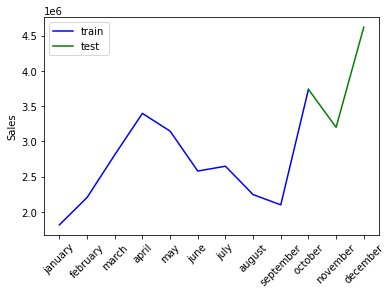

In [44]:
# the code below will show the whole dataframe without spliting it
#plt.plot(sales_year['month'],sales_year['Sales'],color='green')  

plt.plot(train['month'],train['Sales'],label='train',color='blue')
plt.plot(test['month'],test['Sales'],label='test',color='green')
plt.xticks(rotation = 45)
plt.ylabel('Sales')
plt.legend()

to forecast I will use sarimax,sarimax need order and seasonal order as parameters and we will need to find those values first,auto_arima does this for us automatically.Let's firts fit the model with the default parameters.

<br><br>
we need to find is our data is stationary or not and hence if we should differentiate the data and use the parameter "d" in the model sarimax.To do this I will be using Augmented Dickey-Fuller test, ADFTest, which will return the p value and if we should differentiate and hence use the "d" parameter.

In [80]:
from pmdarima.arima import ADFTest
adf_test=ADFTest()
p_val,should_diff=adf_test.should_diff(sales_year['Sales'])
p_val,should_diff

(0.5766875941334422, True)

As we get the "True" result we should differentiate, this is, we must set d=1 and D=1 in the parameters of SARIMAX.
<br><br>

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

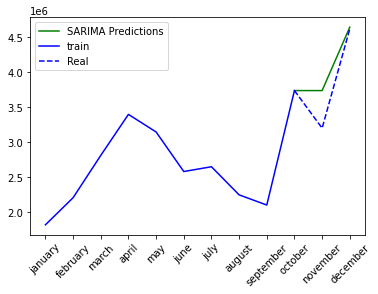

In [118]:
# default parameters for sarimax
SARIMAXmodel = SARIMAX(train['Sales'], order = (0, 1, 0), seasonal_order=(0,1,0,12))
SARIMAXmodel = SARIMAXmodel.fit(disp=0)
yhat = SARIMAXmodel.forecast(len(test.index))
# we set the month as index an match it to the index of predicctions so the line start in the correct month
yhat.index=test.index
# PLOTING THE TRAIN, TEST,AND PREDICCTIONS
plt.plot(yhat, color='green', label = 'SARIMA Predictions')
plt.plot(train['month'],train['Sales'],label='train',color='blue')
plt.plot(test['month'],test['Sales'],label='Real',color='blue',linestyle='dashed')
plt.xticks(rotation = 45)
plt.legend()

This is the predicction using the Sarimax model which is very accurate, in this case we can see that the model is close to the actual data but is not exact due to the necessity of more history data.